<h1><center>CSE391 programming for data science</center></h1>

<h1><center>Lecture 7</center></h1>
<h1><center>Sept 19th ,2018 </center></h1>

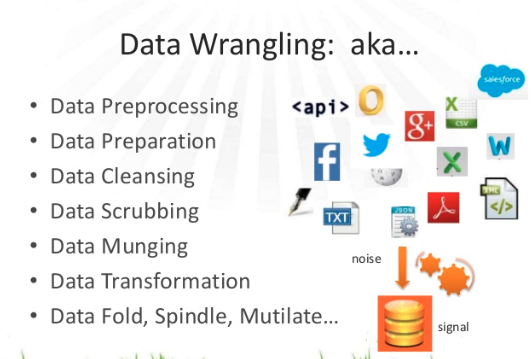

# Data Preprocessing (cleaning)
1.  Reading the file in a structural format (excel type format)
2.  Dealing with missing values 
3. Finding outliers and dealing with them 
4. normalization
5. possible visualization


# Reading and Handling Data files using Pandas
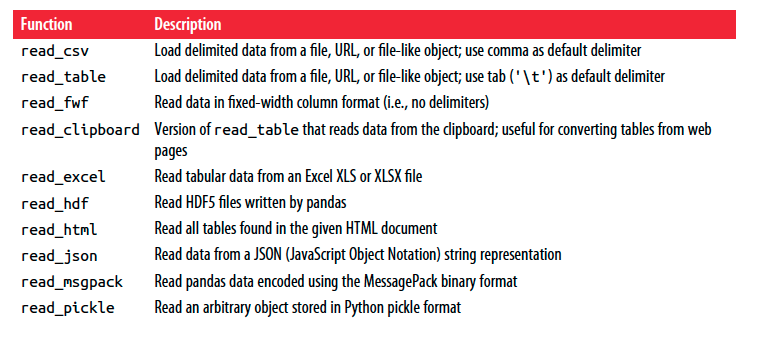
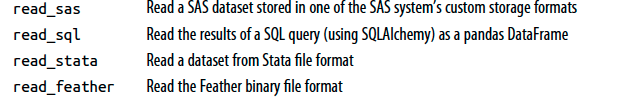

# Working on AirPassengers data set:
- The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.

- source AARSHAY JAIN 

In [10]:
import pandas as pd
import numpy as np
import datetime as dtime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

###  Now, we can load the data set and look at some initial rows and data types of the columns:

In [12]:
?pd.read_csv

In [13]:
filepath = '/Users/nafi/Downloads/'
air = 'AirPassengers.csv'
data = pd.read_csv(filepath+air)
print(data.head(10))
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
5  1949-06          135
6  1949-07          148
7  1949-08          148
8  1949-09          136
9  1949-10          119

 Data Types:
Month          object
#Passengers     int64
dtype: object


#  Dealing with missing values

# Two type of missing data
- missing completly at random
- mising not at random

# How to deal with missing data
- drop out 
- imputation 
     - expert gussing
     - averaging 
     - regression
     - Expectation maximization


# 1.1 Drop the missing values.



In [14]:
#filepath = '/Users/martin/Documents/MyLecturesSBU/Fall2018/CSE391/data/titanic_train.csv'
titanic = 'titanic_train.csv'
passengers = pd.read_csv(filepath+titanic)
passengers.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- This will drop any rows with missing values. Clearly this isn't a good idea
- What instead if we wanted to remove any columns with missing values? How?

In [15]:
passengers.dropna(axis = 1).head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [20]:
# Keep only the rows with at least 11 non-na values:
passengers.dropna(thresh = 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


## 1.2 imputation ( a way to replace the missing values) 
- Filling the missing values
    -  mean
    - your suggestion?

In [7]:
 passengers["Age"].fillna(value=passengers["Age"].mean()).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

# The apply function in Pandas
-This is one of the most powerful tools available in Pandas. Apply, allows you to either use Python's built-in functions or to create your own custom function and then run it across a set of your data.

## Let's define a function to map each embarked city to a letter

In [21]:
def get_full_city_name(cityCode):
    if (cityCode == "S"):
        return "Southampton"
    elif (cityCode == "C"):
        return "Cherbourg"
    elif (cityCode == "Q"):
        return "Queenstown"

In [22]:
passengers["Embarked"].apply(get_full_city_name).head(10)

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
5     Queenstown
6    Southampton
7    Southampton
8    Southampton
9      Cherbourg
Name: Embarked, dtype: object

# Using Lambda function
Lambda expressions allow you to create functions on the fly. This means you can create a function when you need it and then apply that to the relevant data set.

In [23]:
# Updating the fares for all the passengers
passengers["Fare"].apply(lambda fare: 106 * fare).head(5)

0     768.5000
1    7556.0298
2     840.0500
3    5628.6000
4     853.3000
Name: Fare, dtype: float64

# Boolian Indexing in Pandas
- selecting across multiple columns with python pandas


In [24]:
# creat a data frame

d = pd.DataFrame({'x':[1, 2, 3, 4, 5], 'y':[4, 5, 6, 7, 8]})
d

,x,y
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


In [25]:
d[(d['x']>2) & (d['y']>7)]

,x,y
4,5,8


- List comprehensions and map method of DataFrames can also be used to produce more complex column selection criteria:

In [26]:
df2 = pd.DataFrame({'a' : ['one', 'one', 'two', 'three', 'two', 'one', 'six'],
   .....:                     'b' : ['x', 'y', 'y', 'x', 'y', 'x', 'x'],
   .....:                     'c' : np.random.randn(7)})
   .....: 
        
df2

,a,b,c
0,one,x,-0.329170
1,one,y,-0.707264
2,two,y,-0.758952
3,three,x,-1.213496
4,two,y,1.439900
5,one,x,-0.208247
6,six,x,0.361461


In [27]:

criterion = df2['a'].map(lambda x: x.startswith('t'))
print(criterion)

print(df2[criterion])

0    False
1    False
2     True
3     True
4     True
5    False
6    False
Name: a, dtype: bool
       a  b         c
2    two  y -0.758952
3  three  x -1.213496
4    two  y  1.439900


# Step Back to Numpy and do some practice.

In [29]:
# More on array indexing and slicing 
# based on an article from Ayushi Asthana at geeksforgeeks

import numpy as np 
a = np.array([[1,2,3],[3,4,5],[4,5,6]]) 
print(a ) 

# slice items starting from index
print('Now we will slice the array from the index a[1:]' )
print(a[1:])

# Python program for basic slicing.
import numpy as np
 
# Arrange elements from 0 to 19
a = np.arange(20)
print("\n Array is:\n ",a)
 
# a[start:stop:step]
print("\n a[-8:17:1]  = ",a[-8:17:1]) 
 
# The : operator means all elements till the end.
print("\n a[10:]  = ",a[10:])

# Advanced indexing

#Purely integer indexing
# Python program showing advanced indexing
import numpy as np
 
a = np.array([[1 ,2 ],[3 ,4 ],[5 ,6 ]])
print(a[[0 ,1 ,2 ],[0 ,0 ,1]])

#Boolean Indexing 
# You may wish to select numbers greater than 50
import numpy as np
 
a = np.array([10, 40, 80, 50, 100])
print(a[a>50])

# You may wish to square the multiples of 40 
import numpy as np
 
a = np.array([10, 40, 80, 50, 100])
print(a[a%40==0]**2)

[[1 2 3]
 [3 4 5]
 [4 5 6]]
Now we will slice the array from the index a[1:]
[[3 4 5]
 [4 5 6]]

 Array is:
  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

 a[-8:17:1]  =  [12 13 14 15 16]

 a[10:]  =  [10 11 12 13 14 15 16 17 18 19]
[1 3 6]
[ 80 100]
[1600 6400]


# Summarizing and Computing Descriptive Statistics

Pandas objects are equipped with a set of common mathematical and statistical methods.
Most of these fall into the category of reductions or summary statistics, methods
that extract a single value (like the sum or mean) from a Series or a Series of values
from the rows or columns of a DataFrame.

In [30]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], index=['a', 'b', 'c', 'd'],
.....: columns=['one', 'two'])
print(df)

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


- Calling DataFrame’s sum method returns a Series containing column sums

In [31]:
df.sum()

one    9.25
two   -5.80
dtype: float64

- computing mean

In [ ]:
df.mean(axis='columns', skipna=False)

m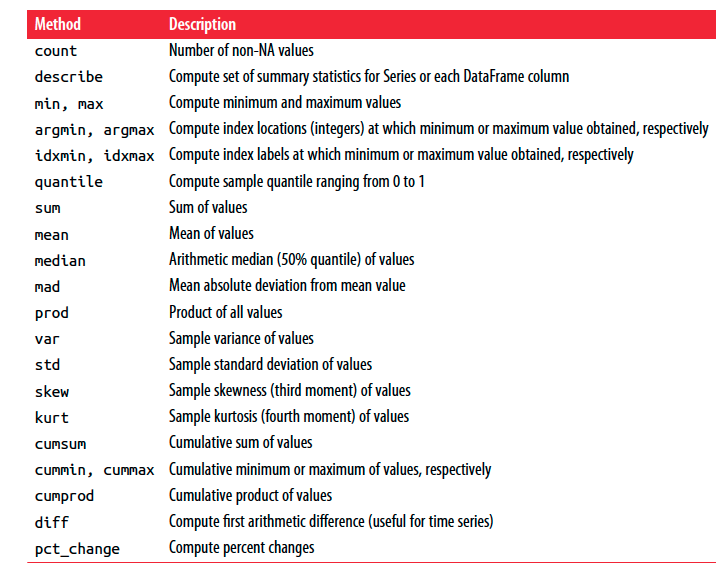

#  Note on mean, median, mode and their differences:

Find the mean, median, mode, and range for the following list of values:
13, 18, 13, 14, 13, 16, 14, 21, 13

The mean is the usual average, so I'll add and then divide:

(13 + 18 + 13 + 14 + 13 + 16 + 14 + 21 + 13) ÷ 9 = 15

Note that the mean, in this case, isn't a value from the original list. This is a common result. You should not assume that your mean will be one of your original numbers.

The median is the middle value, so first I'll have to rewrite the list in numerical order:

13, 13, 13, 13, 14, 14, 16, 18, 21

There are nine numbers in the list, so the middle one will be the (9 + 1) ÷ 2 = 10 ÷ 2 = 5th number:

13, 13, 13, 13, 14, 14, 16, 18, 21

So the median is 14.

The mode is the number that is repeated more often than any other, so 13 is the mode.

The largest value in the list is 21, and the smallest is 13, so the range is 21 – 13 = 8.

mean: 15
median: 14
mode: 13
range: 8

Note: The formula for the place to find the median is "([the number of data points] + 1) ÷ 2", but you don't have to use this formula. You can just count in from both ends of the list until you meet in the middle, if you prefer, especially if your list is short. Either way will work.

# [7 most commonly asked questions on Correlation](https://www.analyticsvidhya.com/blog/2015/06/correlation-common-questions/)

# Reading Text Files in Pieces
- When processing very large files or figuring out the right set of arguments to correctly process a large file, you may only want to read in a small piece of a file or iterate through smaller chunks of the file.

In [ ]:
# If you want to only read a small number of rows (avoiding reading the entire file),specify that with nrows:
pd.read_csv('examples/ex6.csv', nrows=5)
# To read a file in pieces, specify a chunksize as a number of rows:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)

# The TextParser object returned by read_csv allows you to iterate over the parts ofthe file according to the chunksize. For example, we can iterate over ex6.csv, aggregating
#the value counts in the 'key' column like so:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
    tot = tot.sort_values(ascending=False)

# Pivot tables in Pandas 
## Panada pivot table example
- Adapted from[Chris Moffitt](http://pbpython.com/pandas-pivot-table-explained.html)

In [ ]:
# Read in the data; sale pipleline data
df = pd.read_excel("/Users/martin/Documents/MyLecturesSBU/Spring2018/CSE391/data/sales-funnel.xlsx")
df

In [ ]:
# This isn’t strictly required but helps us keep the order we want as we work through analyzing the data.

df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)


In [ ]:
#The simplest pivot table must have a dataframe and an index . In this case, let’s use the Name as our index.
pd.pivot_table(df,index=["Name"])

In [ ]:
# You can have multiple indexes as well
pd.pivot_table(df,index=["Name","Rep","Manager"])

In [ ]:
pd.pivot_table(df,index=["Manager","Rep"])

In [ ]:
 # the Account and Quantity columns aren’t really useful.
#Let’s remove it by explicitly defining the columns we care about using the values field.

pd.pivot_table(df,index=["Manager","Rep"],values=["Price"])

In [ ]:
# The price column automatically averages the data 
# but we can do a count or a sum. Adding them is simple using aggfunc and np.sum .
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

- if we want to see sales broken down by the products, the columns variable allows us to define one or more columns.

In [ ]:
table = pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum])
table

- Remember, columns are optional - they provide an additional way to segment the actual values you care about. The aggregation functions are applied to the values you list.

## Advanced Pivot Table Filtering
- If you want to look at just one manager:

In [ ]:

table.query('Manager == ["Debra Henley"]')

### Another pivot table example in Pandas 

In [ ]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
...                          "bar", "bar", "bar", "bar"],
...                    "B": ["one", "one", "one", "two", "two",
...                          "one", "one", "two", "two"],
...                    "C": ["small", "large", "large", "small",
...                          "small", "large", "small", "small",
...                          "large"],
...                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})

df

In [ ]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
...                     columns=['C'], aggfunc=np.sum)

table

# Hierarchical Indexing (AKA multiple indexing) in Pandas
- adapted from  Python Data Science Handbook by [Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html)

- Suppose you would like to track data about states from two different years. Using the Pandas tools we've already covered, you might be tempted to simply use Python tuples as keys:

In [ ]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

- But the convenience ends there. For example, if you need to select all values from 2010, you'll need to do some messy (and potentially slow) munging to make it happen:

In [ ]:
pop[[i for i in pop.index if i[1] == 2010]]

- The Better Way: Pandas MultiIndex

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

- Notice that the MultiIndex contains multiple levels of indexing–in this case, the state names and the years, as well as multiple labels for each data point which encode these levels.

- If we re-index our series with this MultiIndex, we see the hierarchical representation of the data:

In [ ]:
pop = pop.reindex(index)
pop

In [ ]:
# Now to access all data for which the second index is 2010,
# we can simply use the Pandas slicing notation:

pop[:,2010]

In [ ]:
pop_df = pop.unstack()
pop_df

# Join and Merge Pandas Dataframe
- adapted from [Chris Albon](https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/)

In [ ]:
#Create a dataframe
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

In [ ]:
# Create a second dataframe
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

In [ ]:
# create a third dataframe
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

- Join the two dataframes along rows

In [ ]:
df_new = pd.concat([df_a, df_b])

df_new

- Join the two dataframes along columns

In [ ]:
pd.concat([df_a, df_b], axis=1)

# Reading big files using Pandas

In [ ]:
import pandas as pd
import numpy as np
#SQLAlchemy is the Python SQL toolkit and Object Relational Mapper 
# that gives application developers the full power and flexibility of SQL.
from sqlalchemy import create_engine

In [ ]:
file = '/Users/martin/Documents/TCGA/tcga_mRNA/COAD_mRNA/COAD.uncv2.mRNAseq_RSEM_normalized_log2.txt'


#This command uses pandas’ “read_csv” command to read in only 5 rows (nrows=5) 
# and then print those rows to the screen. 
pd.read_csv(file,sep='\t',nrows=1)

- Before we can actually work with the data, we need to do something with it so we can begin to filter it to work with subsets of the data. This is usually what I would use pandas’ dataframe for but with large data files, we need to store the data somewhere else. In this case, we’ll set up a local sqllite database, read the csv file in chunks and then write those chunks to sqllite.

- To do this, we’ll first need to create the sqllite database using the following command.

In [ ]:
csv_database = create_engine('sqlite:///csv_database.db')

In [ ]:
#Next, we need to iterate through the CSV file in chunks and store the data into sqllite.

chunksize = 1000
i = 0
j = 1
for df in pd.read_csv(file, chunksize=chunksize, iterator=True):
      df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) 
      df.index += j
      i+=1
      df.to_sql('table', csv_database, if_exists='append')
      j = df.index[-1] + 1

In [ ]:
# To access the data now, you can run commands like the following:

df = pd.read_sql_query('SELECT * FROM "table"', csv_database)


# Array Broadcasting in numpy

- Example 1
> numpy operations are usually done element-by-element which requires two arrays to have exactly the same shape:

In [ ]:
from numpy import array 
a = array([1.0,2.0,3.0])
b = array([2.0,2.0,2.0])
a*b

- Numpy's broadcasting rule relaxes this constraint when the arrays' shapes meet certain constraints.

In [ ]:
from numpy import array
a = array([1.0,2.0,3.0])
b = 2.0
a * b

In [ ]:
from IPython.display import Image
Image(filename ="/Users/martin/Desktop/broad1.png",width=500,height=500)


# Broadcasting Rule
- the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one.
- Examples

In [ ]:
from numpy import array
a = array([[ 0.0, 0.0, 0.0],
           [10.0,10.0,10.0],
           [20.0,20.0,20.0],
           [30.0,30.0,30.0]])
b = array([1.0,2.0,3.0])
a + b


In [ ]:
from IPython.display import Image
Image(filename ="/Users/martin/Desktop/broad2.png",width=500,height=500)

In [ ]:
from IPython.display import Image
Image(filename ="/Users/martin/Desktop/broad3.png",width=500,height=500)